<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/LR_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
read_file = pd.read_csv (r'kc_house_price.txt')
read_file.to_csv (r'data.csv', index=None)
df=pd.read_csv (r'data.csv')
df=df[['price','sqft_living','bedrooms']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   sqft_living  21597 non-null  int64  
 2   bedrooms     21597 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 506.3 KB


In [60]:
df1=df

In [10]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [16]:

X=df[['sqft_living','bedrooms']].to_numpy()
y=df['price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y.shape

(21597,)

In [17]:
# dim of data:
print(X.shape)
print(y.shape)

(21597, 2)
(21597,)


In [21]:
# show some value
X[:10,:]
y[:10]

array([ 221900.,  538000.,  180000.,  604000.,  510000., 1230000.,
        257500.,  291850.,  229500.,  323000.])

In [22]:
#Do Statistical summary of all attributes

1041.8475251192294


In [23]:
df['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [25]:
df['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [26]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab4b422090>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab4b72fa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab4b422c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab4b735550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab4b40eb50>],
 'means': []}

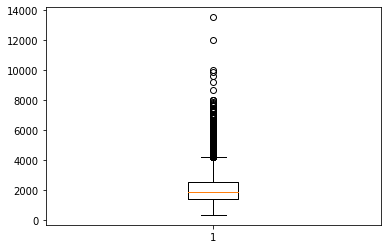

In [27]:
plt.boxplot(df['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab4b6283d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab4b58d810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab4b6282d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab4b594310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab4b594850>],
 'means': []}

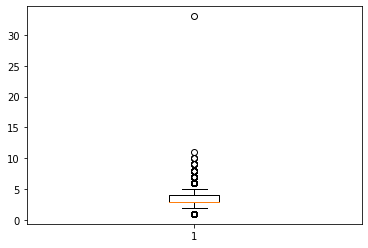

In [32]:
plt.boxplot(df['bedrooms'])

In [49]:
q75=2550.0
q25=1430.0
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
l2=np.where(df['sqft_living']>max)
l1=np.where(df['sqft_living']<min)
sqrt_living_union=np.union1d(l2,l1)


array([    5,    70,   115,   153,   239,   269,   270,   300,   313,
         314,   384,   419,   436,   484,   486,   512,   518,   527,
         532,   540,   551,   556,   577,   679,   691,   722,   779,
         799,   814,   942,  1030,  1054,  1060,  1099,  1121,  1132,
        1162,  1169,  1197,  1259,  1270,  1292,  1313,  1359,  1394,
        1446,  1537,  1584,  1620,  1674,  1728,  1730,  1752,  1768,
        1805,  1846,  1919,  1929,  1942,  2038,  2083,  2086,  2123,
        2198,  2234,  2252,  2265,  2296,  2319,  2353,  2364,  2381,
        2387,  2397,  2409,  2442,  2459,  2576,  2618,  2624,  2666,
        2711,  2770,  2844,  2856,  2862,  2882,  2897,  2972,  3018,
        3098,  3118,  3201,  3228,  3234,  3268,  3335,  3381,  3382,
        3510,  3515,  3704,  3717,  3731,  3744,  3809,  3867,  3910,
        3917,  3950,  4019,  4020,  4028,  4031,  4145,  4186,  4395,
        4402,  4407,  4424,  4464,  4470,  4482,  4577,  4604,  4619,
        4622,  4692,

In [48]:
q75_b=4
q25_b=3
intr_qr = q75_b-q25_b
max_b = q75_b+(1.5*intr_qr)
min_b = q25_b-(1.5*intr_qr)
l2b=np.where(df['bedrooms']>max_b)
l1b=np.where(df['bedrooms']<min_b)
print(len(l2b[0]))
print(len(l1b[0]))
bedrooms_union=np.union1d(l2b,l1b)

334
196


530

In [54]:
total=np.union1d(bedrooms_union,sqrt_living_union)
len(total)

1041

In [64]:
df1=df1.drop(total,axis=0)

KeyError: ignored

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20556 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20556 non-null  float64
 1   sqft_living  20556 non-null  int64  
 2   bedrooms     20556 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


{'whiskers': [<matplotlib.lines.Line2D at 0x7fab461efed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab461f5990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab461ef950>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab461fc490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab461fc9d0>],
 'means': []}

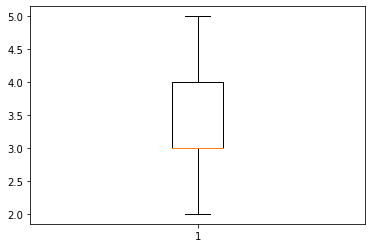

In [87]:
plt.boxplot(df1['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab4a51cb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab4a521610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab4a51c590>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab4a529110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab4a529650>],
 'means': []}

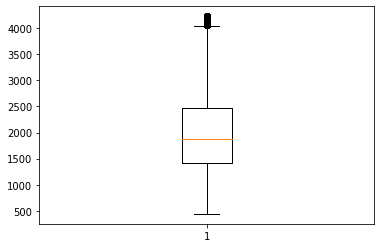

In [68]:
plt.boxplot(df1['sqft_living'])

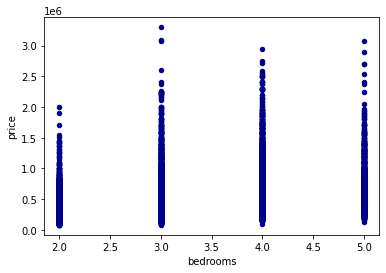

In [69]:
df1.plot.scatter(x='bedrooms', y='price', c='DarkBlue')

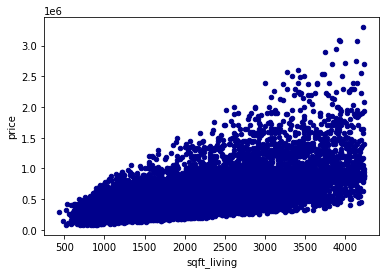

In [70]:
df1.plot.scatter(x='sqft_living', y='price', c='DarkBlue')

In [71]:
corr_matrix = df1.corr()
print(corr_matrix)

                price  sqft_living  bedrooms
price        1.000000     0.628670  0.281502
sqft_living  0.628670     1.000000  0.590785
bedrooms     0.281502     0.590785  1.000000


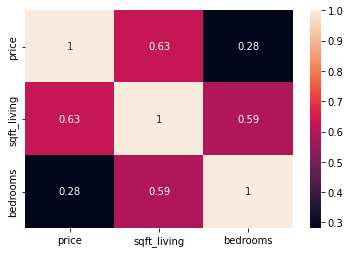

In [72]:
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)
plt.show()

(array([1.834e+03, 6.773e+03, 5.390e+03, 3.146e+03, 1.764e+03, 7.340e+02,
        3.150e+02, 2.280e+02, 1.310e+02, 8.000e+01, 6.200e+01, 3.900e+01,
        1.100e+01, 2.100e+01, 1.000e+01, 8.000e+00, 4.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00]),
 array([  78000.,  239100.,  400200.,  561300.,  722400.,  883500.,
        1044600., 1205700., 1366800., 1527900., 1689000., 1850100.,
        2011200., 2172300., 2333400., 2494500., 2655600., 2816700.,
        2977800., 3138900., 3300000.]),
 <a list of 20 Patch objects>)

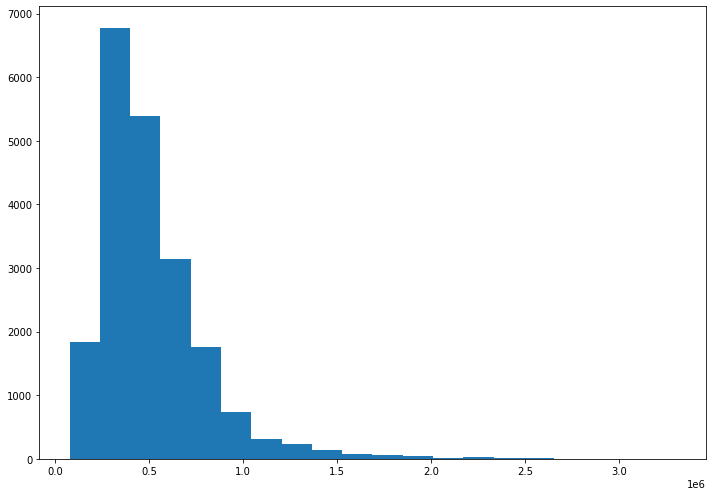

In [73]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(df1['price'], bins = 20)

(array([  27.,  378.,  945., 1472., 1955., 2136., 2099., 1969., 1840.,
        1576., 1384., 1103.,  869.,  750.,  619.,  454.,  341.,  268.,
         212.,  159.]),
 array([ 440. ,  629.5,  819. , 1008.5, 1198. , 1387.5, 1577. , 1766.5,
        1956. , 2145.5, 2335. , 2524.5, 2714. , 2903.5, 3093. , 3282.5,
        3472. , 3661.5, 3851. , 4040.5, 4230. ]),
 <a list of 20 Patch objects>)

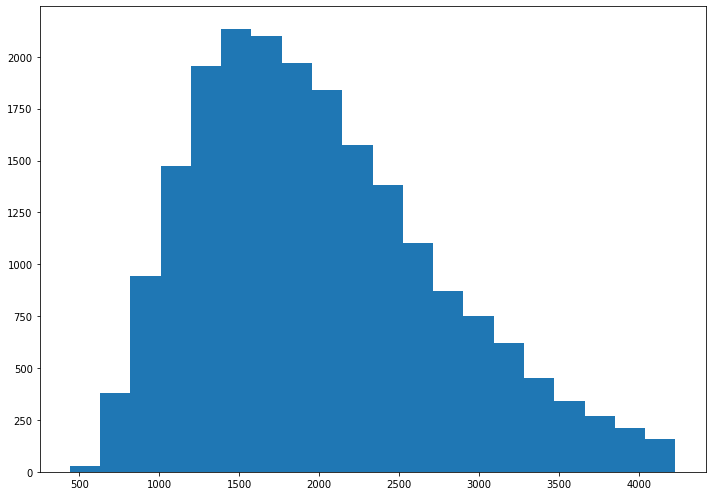

In [80]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df1['sqft_living'], bins = 20)

(array([2759.,    0.,    0.,    0.,    0.,    0., 9782.,    0.,    0.,
           0.,    0.,    0.,    0., 6602.,    0.,    0.,    0.,    0.,
           0., 1413.]),
 array([2.  , 2.15, 2.3 , 2.45, 2.6 , 2.75, 2.9 , 3.05, 3.2 , 3.35, 3.5 ,
        3.65, 3.8 , 3.95, 4.1 , 4.25, 4.4 , 4.55, 4.7 , 4.85, 5.  ]),
 <a list of 20 Patch objects>)

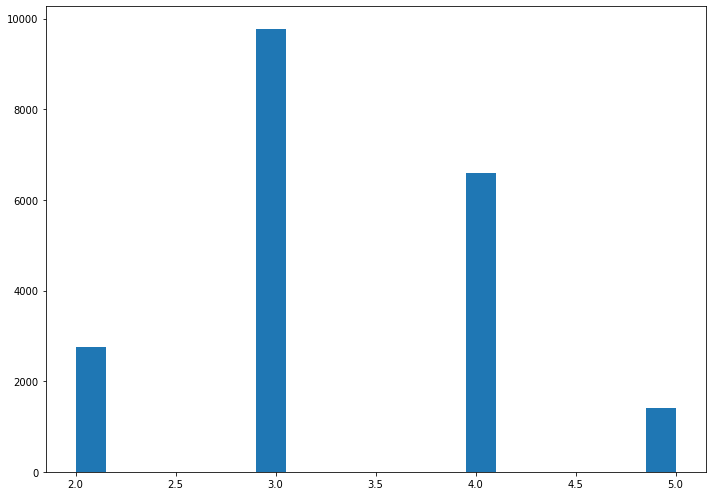

In [77]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.hist(df1['bedrooms'], bins = 20)

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20556 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20556 non-null  float64
 1   sqft_living  20556 non-null  int64  
 2   bedrooms     20556 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [89]:
X=df1[['sqft_living','bedrooms']].to_numpy()
y=df1['price'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Coefficients:  [   262.43994638 -48325.91702624]
Variance score: 0.4156058479440147


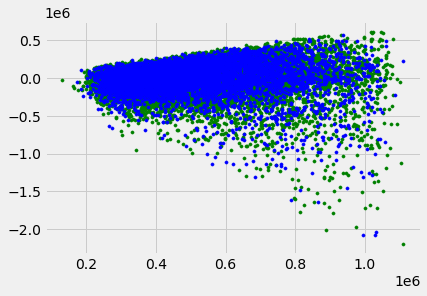

In [92]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')